In [24]:
# Start by importing the usual stuff

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 

pd.options.mode.copy_on_write = True

In [2]:
# Functions from the authors of ISLP

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Question 1

In [ ]:
### part (a) 
# regression, inference, n=500, p=3

### part (b)
# classification, prediction, n=30, p=15

### part (c) 
# regression, prediction, n=52 (53 is ok), p=3

## Question 2

In [100]:
import numpy as np
import pandas as pd

d = {'X1': pd.Series([0,3,0,0,-1,1]),
     'X2': pd.Series([2,0,1,1,0,1]),
     'X3': pd.Series([0,0,3,2,1,1]),
     'Y': pd.Series(['Red','Red','Red','Green','Green','Red'])}
df = pd.DataFrame(d)
df.index = np.arange(1, len(df) + 1)
df

,X1,X2,X3,Y
1,0,2,0,Red
2,3,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


In [101]:
### part (a)

from math import sqrt
df['distance']=np.sqrt(df['X1']**2+df['X2']**2+df['X3']**2)
df

,X1,X2,X3,Y,distance
1,0,2,0,Red,2.000000
2,3,0,0,Red,3.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


In [102]:
df.sort_values(['distance'])

,X1,X2,X3,Y,distance
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051
1,0,2,0,Red,2.000000
4,0,1,2,Green,2.236068
2,3,0,0,Red,3.000000
3,0,1,3,Red,3.162278


In [ ]:
### part (i): 
# When K=1, the prediction is Green because the nearest point is observation #5
### part (i): 
# When K=3, the prediction is Red, because two of the three nearest points are red.

In [104]:
### part (b)

df['distance_manhattan']=np.sqrt(abs(df['X1'])+abs(df['X2'])+abs(df['X3']))
df.sort_values(['distance_manhattan'])

,X1,X2,X3,Y,distance,distance_manhattan
1,0,2,0,Red,2.000000,1.414214
5,-1,0,1,Green,1.414214,1.414214
2,3,0,0,Red,3.000000,1.732051
4,0,1,2,Green,2.236068,1.732051
6,1,1,1,Red,1.732051,1.732051
3,0,1,3,Red,3.162278,2.000000


In [ ]:
### part (i): 
# When K=1, the prediction is Red, because the nearest point is observation #1
### part (i): 
# When K=3, the prediction is Red, because two of the three nearest points are red.

## Question 3

### Part (a)

In [3]:
# Load the "Boston" data

Boston = pd.read_csv('../data/Boston.csv')
Boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


### Part (b)

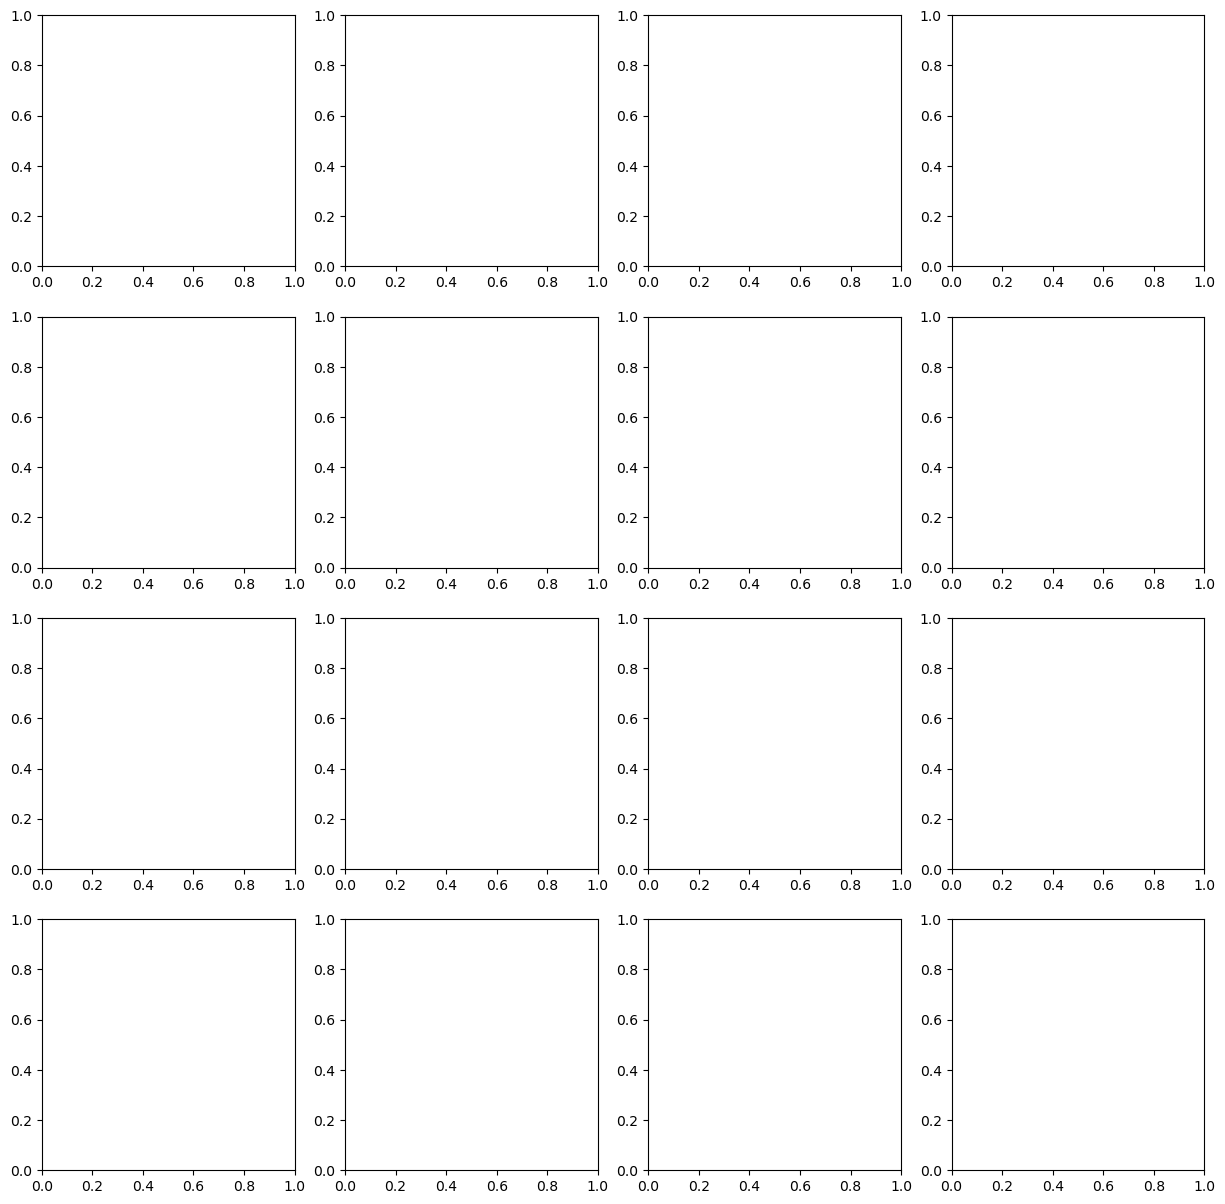

In [14]:
# First create a subset of the columns that we want to plot

subset = Boston[['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat','medv']]

# Initialize the plots before drawing them

fig, axes = subplots(nrows=4,
                     ncols=4,
                     figsize=(15, 15))

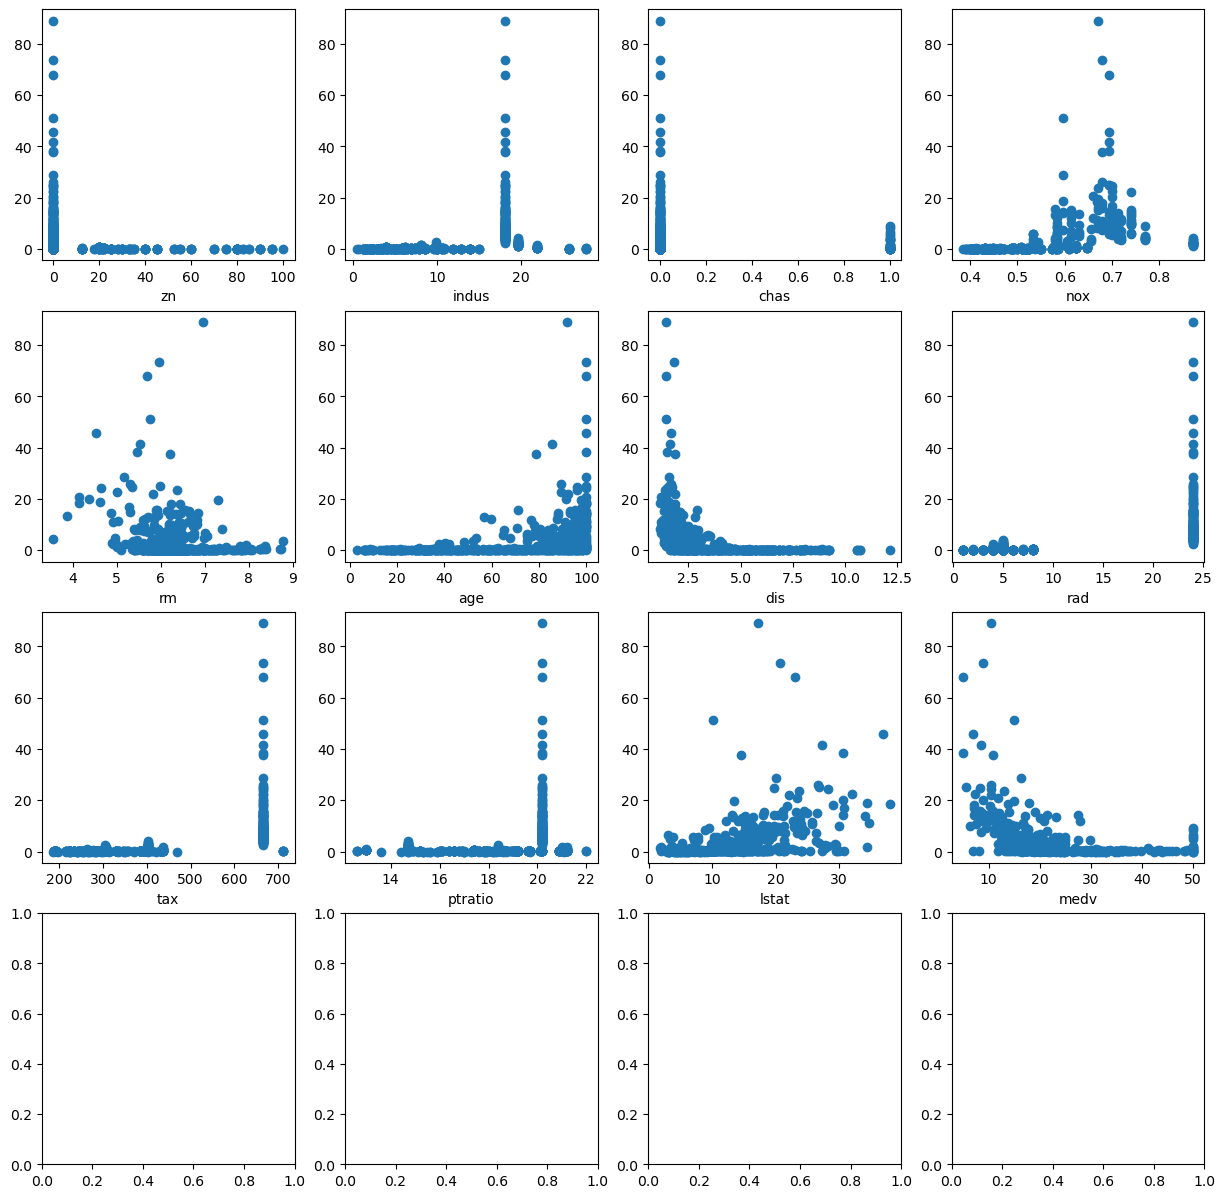

In [15]:
# Copy the helper function

def range_to_grid(i,Ncol):
    x=[]
    y=[]
    for n in range(Ncol**2):
        x.append(int(np.floor(n/Ncol)))
        y.append(n % Ncol)
        #print(n,x[n],y[n])
    return x[i],y[i]

# Plot the variables

for j in range(len(subset.columns)):
#    print(range_to_grid(j,4)[0],range_to_grid(j,4)[1])
    axes[range_to_grid(j,4)[0],range_to_grid(j,4)[1]].plot(subset.iloc[:,j], Boston['crim'], 'o')
    axes[range_to_grid(j,4)[0],range_to_grid(j,4)[1]].set_xlabel(subset.columns[j])
fig

### Part (c)

In [16]:
Boston.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


### Part (d)

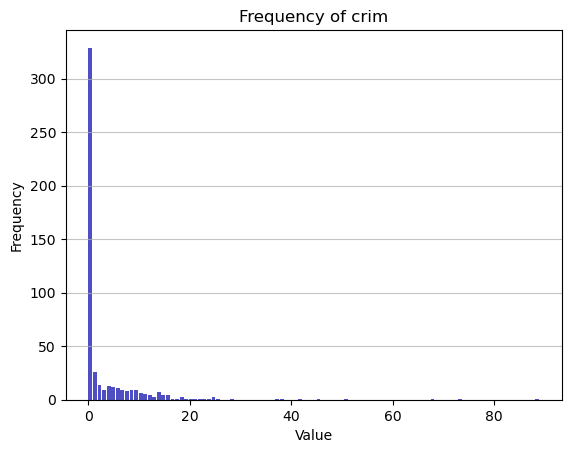

In [25]:
def histogram(var):
    n, bins, patches = plt.hist(x=var, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Frequency of ' + var.name)

histogram(Boston['crim'])

### Part (e)

In [26]:
np.unique(Boston['crim'])

array([6.32000e-03, 9.06000e-03, 1.09600e-02, 1.30100e-02, 1.31100e-02,
       1.36000e-02, 1.38100e-02, 1.43200e-02, 1.43900e-02, 1.50100e-02,
       1.53800e-02, 1.70900e-02, 1.77800e-02, 1.87000e-02, 1.95100e-02,
       1.96500e-02, 2.00900e-02, 2.05500e-02, 2.17700e-02, 2.18700e-02,
       2.49800e-02, 2.54300e-02, 2.72900e-02, 2.73100e-02, 2.76300e-02,
       2.87500e-02, 2.89900e-02, 2.98500e-02, 3.04100e-02, 3.04900e-02,
       3.11300e-02, 3.15000e-02, 3.23700e-02, 3.30600e-02, 3.35900e-02,
       3.42700e-02, 3.44500e-02, 3.46600e-02, 3.50200e-02, 3.51000e-02,
       3.53700e-02, 3.54800e-02, 3.55100e-02, 3.57800e-02, 3.58400e-02,
       3.61500e-02, 3.65900e-02, 3.70500e-02, 3.73800e-02, 3.76800e-02,
       3.87100e-02, 3.93200e-02, 3.96100e-02, 4.01100e-02, 4.11300e-02,
       4.20300e-02, 4.29400e-02, 4.29700e-02, 4.30100e-02, 4.33700e-02,
       4.37900e-02, 4.41700e-02, 4.46200e-02, 4.52700e-02, 4.54400e-02,
       4.56000e-02, 4.59000e-02, 4.66600e-02, 4.68400e-02, 4.741

### Part (f)

In [17]:
Boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Part (g)

In [18]:
Boston['chas'].sum()

35

### Part (h)

In [27]:
Boston['ptratio'].median()

19.05

## Question 4

In [29]:
# Load the "Auto" data

Auto = pd.read_csv('../data/Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [34]:
df = Auto[(Auto['horsepower']!='?')]

In [35]:
df['intercept'] = np.ones(X.shape[0])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,intercept
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,1.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1.0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,1.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,1.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1.0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1.0
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1.0
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1.0
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1.0


In [37]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [38]:
model_1 = sm.OLS(df['mpg'], df[['intercept','horsepower']])
results_1 = model_1.fit()
summarize(results_1)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [ ]:
# Part (i): Since the p-values are very, very small, we can conclude that horsepower is significant.

In [39]:
# Part (ii): we see that horsepower explains about 60% of the variance in mpg

results_1.rsquared

0.6059482578894348

In [ ]:
# Part (iii): the relationship is negative because the coefficient for horsepower is negative.

In [49]:
# Part (iv): 

print('predicted mpg is:',241*-0.1578+39.9359)

predicted mpg is: 1.906099999999995


In [ ]:
# Part (v): best answer is that the model is trained on cars from 1970-1982, 
# so we shouldn't expect it to perform well on a car from 2023.

# Another acceptable answer is that 241 is well outside the range of horsepowers used to train the model.

# Another acceptable answer is that the predicted mpg is outside the range of other mpgs in the training data.

# Another acceptable answer is that we are using a linear model to fit a relationship that is not linear, 
# so the model bias is too high. Or something about how the model doesn't do well for hp > 200. 

### Part (b)

In [42]:
# Define a function to draw a line given coefficients [credit to Hastie & Tibshirani]

def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

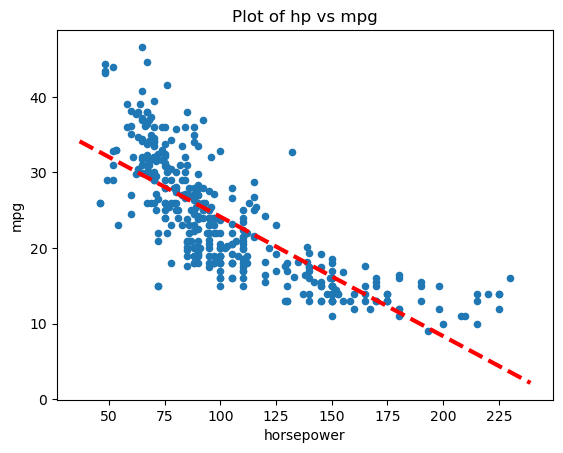

In [43]:
# Plot TV vs sales on training set

ax = df.plot.scatter('horsepower', 'mpg')
ax.set_title("Plot of hp vs mpg")
abline(ax,
       results_1.params[0],
       results_1.params[1],
       'r--',
       linewidth=3)

## Question 5

### Part (a)

In [56]:
model_2 = sm.OLS(df['mpg'], df[['intercept','cylinders','displacement','horsepower','weight','acceleration','year','origin']])
results_2 = model_2.fit()
summarize(results_2)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [57]:
# Part (i): displacement, weight, year, and origin are significant at the .05 level
# Part (ii): the coefficient for year suggests that mpg increases by an average of .75mpg for each increase in year.

In [58]:
def predict(X, model):
    # the built-in get_prediction tool returns an array, so we need to convert to a dataframe
    predictions_df = pd.DataFrame(model.get_prediction(X).predicted, columns=['y_hat'], index=X.index)
    return predictions_df['y_hat']

def mse(y, y_hat):
    # calculate the residual error for each individual record
    resid = y - y_hat
    # square the residual (hence "squared error")
    sq_resid = resid**2
    # calculate the sum of squared errors
    SSR = sum(sq_resid)
    # divide by the number of records to get the mean squared error
    MSE = SSR / y.shape[0]
    return MSE

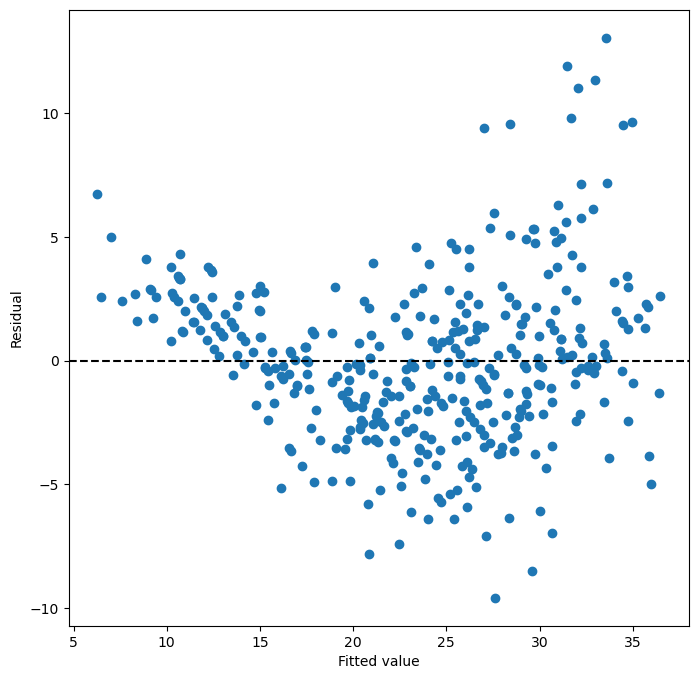

In [62]:
# Part (iii)

predictions_2 = predict(df[['intercept','cylinders','displacement','horsepower','weight','acceleration','year','origin']],results_2)

ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions_2, df['mpg']-predictions_2)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [63]:
### Part (iv)

mse(df['mpg'],predictions_2)

10.847480945000452

### Part (b)

In [53]:
model_3 = sm.OLS(df['mpg'], df[['intercept','displacement','weight','year','origin']])
results_3 = model_3.fit()
summarize(results_3)

,coef,std err,t,P>|t|
intercept,-18.6065,4.028,-4.620,0.000
displacement,0.0056,0.005,1.172,0.242
weight,-0.0066,0.001,-11.802,0.000
year,0.7714,0.050,15.486,0.000
origin,1.2262,0.267,4.593,0.000


In [ ]:
# part (i): No, displacement is not significant in this model. 

In [64]:
predictions_3 = predict(df[['intercept','displacement','weight','year','origin']],results_3)

In [65]:
### Part (ii)

mse(df['mpg'],predictions_3)

11.052879341650879

In [ ]:
### Part (iii)
# I would expect the model in part (b) to perform better on unseen holdout data.
# The model in part (a) contains many variables whose coefficients are not significant, 
# which suggests that it might be overfit.

### Part (c)

In [66]:
df['weight_sq']=df['weight']**2

In [67]:
model_4 = sm.OLS(df['mpg'], df[['intercept','weight','weight_sq','year','origin']])
results_4 = model_4.fit()
summarize(results_4)

,coef,std err,t,P>|t|
intercept,-0.442200,4.058000e+00,-0.109,0.913
weight,-0.020400,2.000000e-03,-13.281,0.000
weight_sq,0.000002,2.330000e-07,9.487,0.000
year,0.824700,4.400000e-02,18.675,0.000
origin,0.502600,2.430000e-01,2.064,0.040


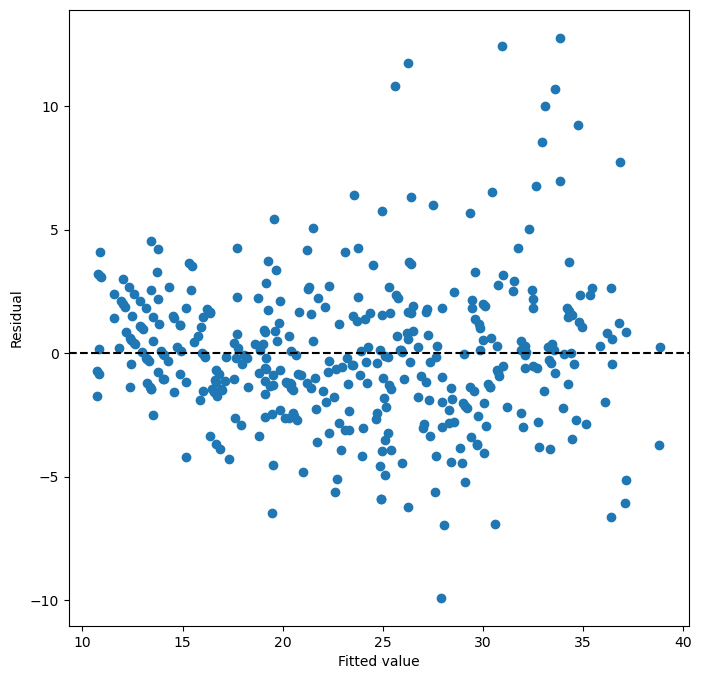

In [68]:
### Part (i)

predictions_4 = predict(df[['intercept','weight','weight_sq','year','origin']],results_4)

ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions_4, df['mpg']-predictions_4)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [ ]:
### Part (ii)
# The coefficient may be small (~0.000002) but the standard error is even smaller (~0.0000002), 
# which suggests that this coefficient is unlikely to be based on randomness.

## Question 6

In [69]:
# Load the "Carseats" data

Carseats = pd.read_csv('../data/Carseats.csv')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [73]:
### Part (a)

Carseats['Intercept'] = np.ones(Carseats.shape[0])

Carseats['Urban_Yes'] = pd.Series(np.zeros(Carseats.shape[0]))
Carseats.loc[Carseats['Urban']=='Yes', 'Urban_Yes'] = 1
Carseats['US_Yes'] = pd.Series(np.zeros(Carseats.shape[0]))
Carseats.loc[Carseats['US']=='Yes', 'US_Yes'] = 1

Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_Yes,US_Yes,Intercept
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1.0,1.0,1.0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1.0,1.0,1.0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1.0,1.0,1.0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1.0,1.0,1.0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1.0,1.0,1.0
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0.0,1.0,1.0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,1.0,1.0,1.0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1.0,1.0,1.0


In [93]:
model_5 = sm.OLS(Carseats['Sales'], Carseats[['Intercept','Price','US_Yes']])
results_5 = model_5.fit()
summarize(results_5)

,coef,std err,t,P>|t|
Intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US_Yes,1.1996,0.258,4.641,0.0


In [ ]:
### Part (b): 
# For each dollar increase in price, sales is reduced by ~55 units.
# The average sales for US stores is ~1200 units higher than non-US stores.

In [94]:
### Part (c)
Carseats['Interaction'] = Carseats['Price']*Carseats['US_Yes']

In [95]:
model_6 = sm.OLS(Carseats['Sales'], Carseats[['Intercept','Price','US_Yes','Interaction']])
results_6 = model_6.fit()
summarize(results_6)

,coef,std err,t,P>|t|
Intercept,12.9748,0.953,13.614,0.000
Price,-0.0540,0.008,-6.613,0.000
US_Yes,1.2958,1.252,1.035,0.301
Interaction,-0.0008,0.011,-0.078,0.937


In [ ]:
### Part (d): The coefficient of the interaction term is -.0008. 
# This means that when the store is in the US, a $1 increase in price will reduce sales by ~53 units, rather than 54.

In [ ]:
### Part (e): This interaction should not be included because the p-value is 0.937, 
# suggesting this interaction coefficient is more likely caused by randomness in the data.